<a href="https://colab.research.google.com/github/rogerolowski/Articles/blob/master/yfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.mathclasstutor.com/2021/08/japan-nikkei-225-price-analysis-in.html
# install a library
!pip install yfinance

In [ ]:
# import libraries
import yfinance as yf # for financial data
import numpy as np # for scientific computing
import pandas as pd # for dealing with data frames
import seaborn as sns # for creating charts
import scipy.stats as scs # for technical computing (pronounced [saɪpa]) 
import statsmodels.api as sm # for providinga complement to scipy for statistical computations
import statsmodels.tsa.api as smt # for providinga complement to scipy for statistical computations
import matplotlib.pyplot as plt # for creating charts

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# load data
df0 = yf.download('^N225',
start='2020-01-01',
end='2021-08-25',
progress=False)
df0

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-06,23319.759766,23365.359375,23148.529297,23204.859375,23204.859375,72800000
2020-01-07,23320.119141,23577.439453,23299.919922,23575.720703,23575.720703,64300000
2020-01-08,23217.490234,23303.210938,22951.179688,23204.759766,23204.759766,79400000
2020-01-09,23530.289062,23767.089844,23506.150391,23739.869141,23739.869141,62200000
2020-01-10,23813.279297,23903.289062,23761.080078,23850.570312,23850.570312,55900000
...,...,...,...,...,...,...
2021-08-19,27398.580078,27504.800781,27255.580078,27281.169922,27281.169922,65100000
2021-08-20,27238.449219,27316.789062,26954.810547,27013.250000,27013.250000,75800000
2021-08-23,27193.099609,27541.630859,27193.099609,27494.240234,27494.240234,56800000


In [ ]:
# select a column
df_adj = df0.loc[:, ['Adj Close']]
# change column names
df_adj.rename(columns={'Adj Close':'adj_close'}, inplace=True)
df_adj.head(5)

,adj_close
Date,
2020-01-06,23204.859375
2020-01-07,23575.720703
2020-01-08,23204.759766
2020-01-09,23739.869141
2020-01-10,23850.570312


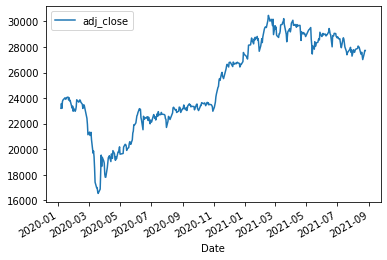

In [ ]:
# create a line chart
df_adj.plot()

In [ ]:
# convert adj_close to log
df_adj['simple_rtn'] = df_adj.adj_close.pct_change()
df_adj['log_rtn'] = np.log(df_adj.adj_close/df_adj.adj_close.shift(1))
df_adj_log = df_adj[['simple_rtn','log_rtn']]
df_adj_log.tail(10)

,simple_rtn,log_rtn
Date,,
2021-08-12,-0.001977,-0.001979
2021-08-13,-0.001352,-0.001353
2021-08-16,-0.016226,-0.016359
2021-08-17,-0.003587,-0.003593
2021-08-18,0.005887,0.005869
2021-08-19,-0.011047,-0.011108
2021-08-20,-0.009821,-0.009869
2021-08-23,0.017806,0.017649
2021-08-24,0.008651,0.008614


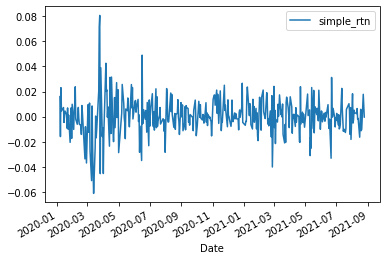

In [ ]:
# create a line chart
df_adj_log.plot(y = 'simple_rtn')

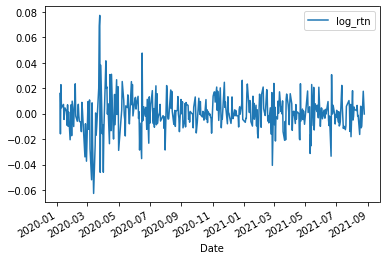

In [ ]:
# create a line chart
df_adj_log.plot(y = 'log_rtn')

In [ ]:
# create a function for realaized volatility
def realized_volatility(x):
 return np.sqrt(np.sum(x**2))

In [ ]:
# get realized volatality 
df_rv = df_adj_log.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv

,simple_rtn,log_rtn
Date,,
2020-01-31,0.047634,0.047648
2020-02-29,0.065219,0.065899
2020-03-31,0.163448,0.162614
2020-04-30,0.098564,0.098258
2020-05-31,0.062186,0.061976
2020-06-30,0.078650,0.078385
2020-07-31,0.050682,0.050747
2020-08-31,0.047215,0.046926
2020-09-30,0.034970,0.035007


In [ ]:
# change column names
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)
# calculate realized volatilities for each month
df_rv.rv = df_rv.rv * np.sqrt(12)
df_rv

,simple_rtn,rv
Date,,
2020-01-31,0.047634,0.165058
2020-02-29,0.065219,0.228281
2020-03-31,0.163448,0.563311
2020-04-30,0.098564,0.340374
2020-05-31,0.062186,0.214690
2020-06-30,0.078650,0.271533
2020-07-31,0.050682,0.175791
2020-08-31,0.047215,0.162555
2020-09-30,0.034970,0.121269


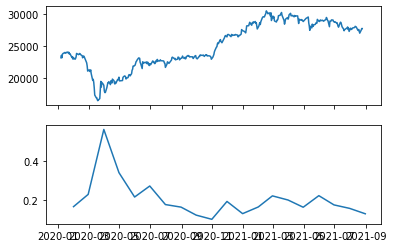

In [ ]:
# create line charts
fig, ax = plt.subplots(2, 1, sharex = True)
ax[0].plot(df_adj.adj_close)
ax[1].plot(df_rv.rv)